## Mục tiêu

- Xu hướng bán hàng tổng thể
- Top 10 sản phẩm theo doanh số bán hàng
- Những sản phẩm bán chạy nhất
- Ship mod nào được ưu tiên nhất
- Các loại sản phẩm có lợi nhận cao nhất 

### Import the Library

In [72]:
#Import library
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Import the Dataset

In [57]:
df = pd.read_excel("superstore_sales.xlsx")

### Kiểm tra dữ liệu

In [58]:
df.sample(10)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
34464,ES-2014-2949307,2014-01-25,2014-02-01,Standard Class,Katherine Hughes,Consumer,Burgundy,France,EU,Central,...,Office Supplies,Storage,"Smead Lockers, Wire Frame",355.482,2,0.1,-3.9780,23.940,Medium,2014
32358,TU-2013-150,2013-12-04,2013-12-08,Standard Class,Debra Catini,Consumer,Bursa,Turkey,EMEA,EMEA,...,Technology,Phones,"Samsung Signal Booster, with Caller ID",218.544,4,0.6,-327.8160,1.680,Medium,2013
9775,IN-2012-26113,2012-02-15,2012-02-18,Second Class,Dean Braden,Consumer,Jammu and Kashmir,India,APAC,Central Asia,...,Office Supplies,Fasteners,"Advantus Push Pins, Metal",43.650,3,0.0,5.2200,0.820,Medium,2012
6093,CA-2011-128538,2011-10-11,2011-10-15,Standard Class,Alan Shonely,Consumer,California,United States,US,West,...,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",7.640,1,0.0,3.7436,0.330,Medium,2011
27795,HU-2013-1550,2013-09-02,2013-09-05,Second Class,Guy Thornton,Consumer,Budapest,Hungary,EMEA,EMEA,...,Furniture,Bookcases,"Dania Stackable Bookrack, Traditional",242.100,2,0.0,101.6400,35.050,High,2013
49415,IT-2014-2304556,2014-12-04,2014-12-11,Standard Class,Maria Bertelson,Consumer,Zürich,Switzerland,EU,Central,...,Technology,Copiers,"Hewlett Copy Machine, High-Speed",1054.680,4,0.0,263.6400,74.540,Medium,2014
24895,ES-2013-1510295,2013-06-20,2013-06-23,First Class,Carlos Daly,Consumer,Lazio,Italy,EU,South,...,Office Supplies,Art,"BIC Pens, Easy-Erase",101.850,7,0.0,22.2600,14.420,High,2013
12305,MX-2012-151260,2012-06-06,2012-06-10,Standard Class,Jenna Caffey,Consumer,Santiago de Cuba,Cuba,LATAM,Caribbean,...,Office Supplies,Envelopes,"Cameo Interoffice Envelope, with clear poly wi...",135.920,4,0.0,12.1600,11.265,High,2012
27683,MX-2013-145107,2013-08-29,2013-09-02,Standard Class,Matthew Clasen,Corporate,Minas Gerais,Brazil,LATAM,South,...,Office Supplies,Fasteners,"OIC Paper Clips, Metal",29.100,3,0.0,6.0600,2.899,Medium,2013
29768,MX-2013-103492,2013-10-10,2013-10-15,Second Class,Sally Knutson,Consumer,Campeche,Mexico,LATAM,North,...,Office Supplies,Labels,"Smead Shipping Labels, Laser Printer Compatible",54.180,7,0.0,12.4600,10.098,High,2013


In [59]:
#Shape
df.shape

(51290, 21)

In [48]:
#Tên các cột 
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [60]:
# summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [50]:
# Checking misssing values
df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [51]:
#Getting description statistics summary
df.describe()

,order_date,ship_date,sales,quantity,discount,profit,shipping_cost,year
count,51290,51290,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,2013-05-11 21:26:49.155780864,2013-05-15 20:42:42.745174528,246.490581,3.476545,0.142908,28.641740,26.375818,2012.777208
min,2011-01-01 00:00:00,2011-01-03 00:00:00,0.444000,1.000000,0.000000,-6599.978000,0.002000,2011.000000
25%,2012-06-19 00:00:00,2012-06-23 00:00:00,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,2013-07-08 00:00:00,2013-07-12 00:00:00,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,2014-05-22 00:00:00,2014-05-26 00:00:00,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000
max,2014-12-31 00:00:00,2015-01-07 00:00:00,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000
std,NaN,NaN,487.565361,2.278766,0.212280,174.424113,57.296810,1.098931


### Khám phá dữ liệu

#### What is the overall sales trend?

In [61]:
#mindate
df['order_date'].min()

Timestamp('2011-01-01 00:00:00')

In [62]:
#maxdate
df['order_date'].max()

Timestamp('2014-12-31 00:00:00')

In [63]:
df['month_year'] = df['order_date'].apply(lambda x: x.strftime('%Y-%m'))

In [68]:
df_trend = df.groupby('month_year')['sales'].sum().reset_index()


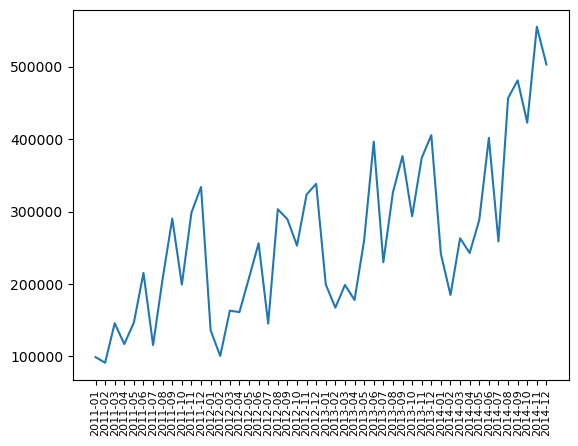

In [77]:
plt.plot(df_trend['month_year'],df_trend['sales'])
plt.xticks(rotation = 'vertical', size = 8)
plt.show()

Nhận xét: 4 tháng đầu của các năm có doanh thu khá thấp, doanh thu tăng mạnh sau 4 tháng,doanh thu tăng dần theo từng năm nên
tổng thể công ty đang phát triển

### Top 10 products by sales

In [78]:
df.head(10)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,month_year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011,2011-01
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011,2011-01
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011,2011-01
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011,2011-01
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011,2011-01
5,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Paper,"Eaton Computer Printout Paper, 8.5 x 11",55.242,2,0.1,15.342,1.80,Medium,2011,2011-01
6,CA-2011-1510,2011-01-02,2011-01-06,Standard Class,Magdelene Morse,Consumer,Ontario,Canada,Canada,Canada,...,Machines,"Okidata Inkjet, Wireless",314.220,1,0.0,3.120,24.10,Medium,2011,2011-01
7,IN-2011-79397,2011-01-03,2011-01-03,Same Day,Kean Nguyen,Corporate,New South Wales,Australia,APAC,Oceania,...,Appliances,"Hoover Microwave, White",276.102,1,0.1,110.412,125.32,Critical,2011,2011-01
8,ID-2011-80230,2011-01-03,2011-01-09,Standard Class,Ken Lonsdale,Consumer,Auckland,New Zealand,APAC,Oceania,...,Copiers,"Hewlett Wireless Fax, Laser",912.456,4,0.4,-319.464,107.10,Low,2011,2011-01
9,IZ-2011-4680,2011-01-03,2011-01-07,Standard Class,Lindsay Williams,Corporate,Ninawa,Iraq,EMEA,EMEA,...,Chairs,"Novimex Swivel Stool, Set of Two",666.840,4,0.0,253.320,81.26,High,2011,2011-01


In [87]:
 df.groupby('product_name')['sales'].sum().reset_index().sort_values(by = 'sales',ascending = False).head(10)

,product_name,sales
310,"Apple Smart Phone, Full Size",86935.7786
970,"Cisco Smart Phone, Full Size",76441.5306
2415,"Motorola Smart Phone, Full Size",73156.3030
2501,"Nokia Smart Phone, Full Size",71904.5555
866,Canon imageCLASS 2200 Advanced Copier,61599.8240
1837,"Hon Executive Leather Armchair, Adjustable",58193.4841
2631,"Office Star Executive Leather Armchair, Adjust...",50661.6840
1714,"Harbour Creations Executive Leather Armchair, ...",50121.5160
2988,"Samsung Smart Phone, Cordless",48653.4600
2502,"Nokia Smart Phone, with Caller ID",47877.7857


### Which are the most selling product

In [92]:
df.groupby('product_name')['quantity'].sum().reset_index().sort_values(by = 'quantity', ascending = False).head(10)

,product_name,quantity
3275,Staples,876
894,"Cardinal Index Tab, Clear",337
1210,"Eldon File Cart, Single Width",321
2840,"Rogers File Cart, Single Width",262
3070,"Sanford Pencil Sharpener, Water Color",259
3335,"Stockwell Paper Clips, Assorted Sizes",253
446,"Avery Index Tab, Clear",252
1981,"Ibico Index Tab, Clear",251
3179,"Smead File Cart, Single Width",250
3266,"Stanley Pencil Sharpener, Water Color",242


### What is the most prefered ship mode?

In [94]:
sns.countplot(df['ship_mode'])

ValueError: could not convert string to float: 'Standard Class'